In [1]:
pip install dataprep

^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 0.0/54.9 kB ? eta -:--:--
     ------------------------------------- -- 51.2/54.9 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 54.9/54.9 kB 950.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/5.2 MB 3.2 MB/s eta 0:00:02
      --------------------------------------- 0.1/5.2 MB 1.5 MB/s eta 0:00:04
      --------------------------------------- 0.1/5.2 MB 819.2 kB/s eta 0:00:07
     - -------------------------------------- 0.1/5.2 MB 853.3 kB/s eta 0:00:06
     - -------------------------------------- 0.2/5.2 MB 908.0 kB/s eta 0:00:06
     - -------------------

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-312\Levenshtein
      copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-312\Levenshtein
      running egg_info
      writing levenshtein.egg-info\PKG-INFO
      writing dependency_links to levenshtein.egg-info\dependency_links.txt
      deleting levenshtein.egg-info\entry_points.txt
      writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
      writing requirements to levenshtein.egg-info\requires.txt
      writing top-level names to levenshtein.egg-info\top_level.txt
      reading manifest file 'levenshtein.egg-info\SOURCES.txt'
      reading m

In [63]:
pip install markupsafe==2.0.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


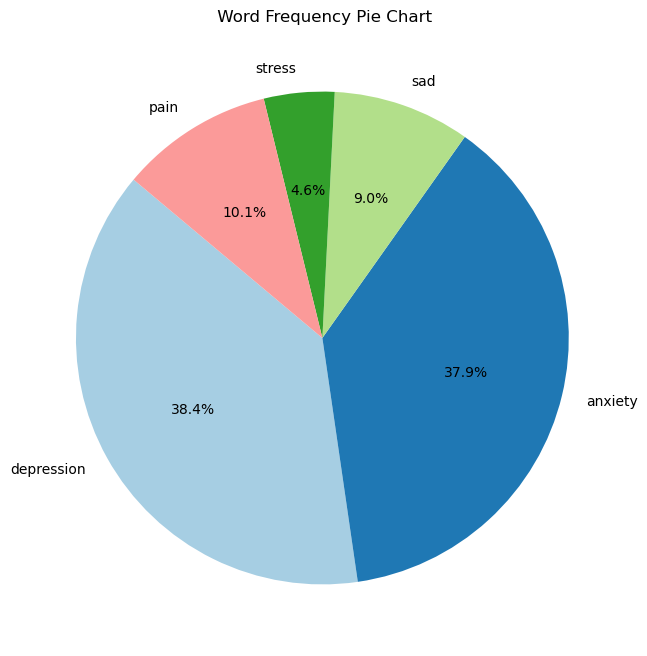

In [64]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

file_path = "training_data.csv"  
df = pd.read_csv(file_path)

df.head()

user_words = 'depression, sad, anxiety, stress, pain'
word_list = [word.strip().lower() for word in user_words.split(",")]


text_data = df["caption"].str.lower()  

all_words = text_data.str.split(expand=True).stack()  

word_counts = Counter([word for word in all_words if word in word_list])

plt.figure(figsize=(8, 8))
plt.pie(
    word_counts.values(), 
    labels=word_counts.keys(), 
    autopct='%1.1f%%', 
    startangle=140,
    colors=plt.cm.Paired(range(len(word_counts)))
)
plt.title(" Word Frequency Pie Chart")
plt.show()


Words with the highest correlation with predicted depression label:
thought        0.574106
#friendzone    0.574106
before         0.574106
disappeared    0.574106
chances        0.574106
option         0.574106
considered     0.574106
even           0.574106
realized       0.574106
sank           0.574106
Name: predicted_depression_label, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


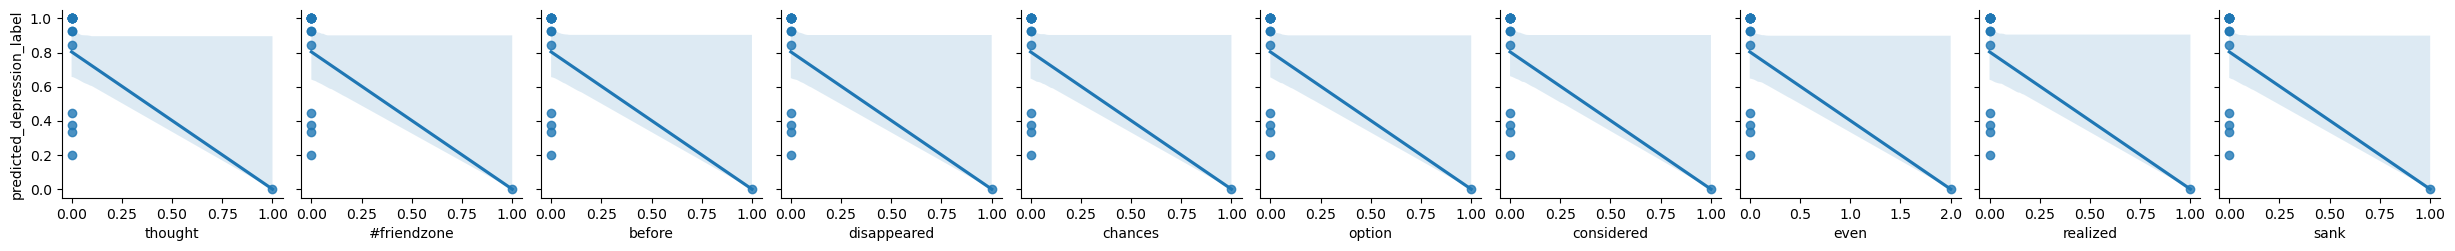

In [65]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "forpurp.csv" 
df = pd.read_csv(file_path)


if 'text' not in df.columns or 'predicted_depression_label' not in df.columns:
    raise ValueError("The CSV must contain 'text' and 'predicted_depression_label' columns")


df['text'] = df['text'].str.lower()  


def get_words(text):
    words = text.split()
    return [word.strip('.,!?') for word in words]

df['words'] = df['text'].apply(get_words)  

all_words = [word for words_list in df['words'] for word in words_list]
word_freq = df['words'].apply(Counter)
word_df = pd.DataFrame.from_records(word_freq).fillna(0)

word_df['predicted_depression_label'] = df['predicted_depression_label']


correlations = word_df.corr()['predicted_depression_label'].drop('predicted_depression_label') 
top_correlations = correlations.abs().sort_values(ascending=False)

print("Words with the highest correlation with predicted depression label:")
print(top_correlations.head(10))
top_words = top_correlations.head(10).index
sns.pairplot(word_df, x_vars=top_words, y_vars='predicted_depression_label', kind='reg')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Words with the highest correlation with predicted depression label:
disappeared    0.574106
begin          0.574106
chances        0.574106
option         0.574106
thought        0.574106
playing        0.574106
team           0.574106
💔              0.574106
considered     0.574106
guess          0.574106
Name: predicted_depression_label, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


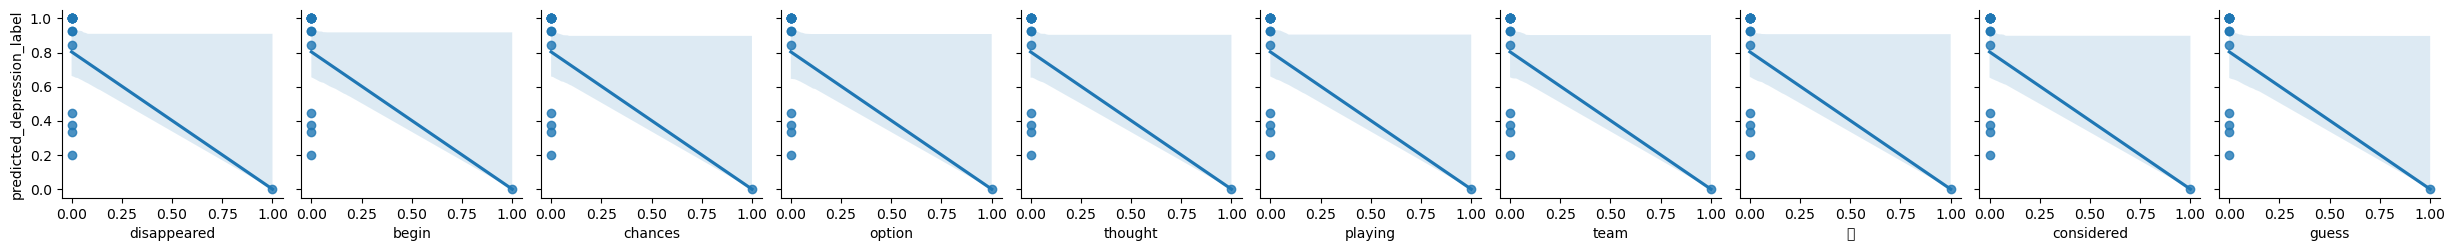

In [66]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

file_path = "forpurp.csv"  
df = pd.read_csv(file_path)

if 'text' not in df.columns or 'predicted_depression_label' not in df.columns:
    raise ValueError("The CSV must contain 'text' and 'predicted_depression_label' columns")

stop_words = set(stopwords.words("english"))

df['text'] = df['text'].str.lower()  


def get_words(text):
    words = text.split()
    return [word.strip('.,!?') for word in words if word.strip('.,!?') not in stop_words]

df['words'] = df['text'].apply(get_words)

all_words = [word for words_list in df['words'] for word in words_list]

word_freq = df['words'].apply(Counter)
word_df = pd.DataFrame.from_records(word_freq).fillna(0)

word_df['predicted_depression_label'] = df['predicted_depression_label']

correlations = word_df.corr()['predicted_depression_label'].drop('predicted_depression_label') 
top_correlations = correlations.abs().sort_values(ascending=False)

print("Words with the highest correlation with predicted depression label:")
print(top_correlations.head(10))

top_words = top_correlations.head(10).index


plt.figure(figsize=(12, 8)) 

sns.pairplot(
    word_df, 
    x_vars=top_words, 
    y_vars='predicted_depression_label', 
    kind='reg'
)

plt.show()


In [67]:
# If needed: Install TensorFlow and related libraries
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


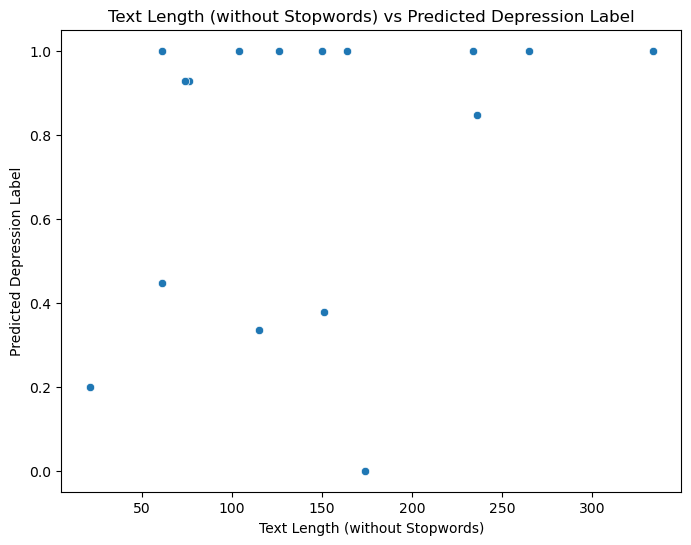

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords


df = pd.read_csv(file_path)


stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)


df['text_no_stopwords'] = df['text'].apply(remove_stopwords)


df['text_length_no_stopwords'] = df['text_no_stopwords'].apply(len)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='text_length_no_stopwords', y='predicted_depression_label')
plt.title("Text Length (without Stopwords) vs Predicted Depression Label")
plt.xlabel("Text Length (without Stopwords)")
plt.ylabel("Predicted Depression Label")
plt.show()


In [69]:
from collections import Counter


def get_filtered_words(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words


threshold = df['predicted_depression_label'].median()

high_depression_texts = df[df['predicted_depression_label'] > threshold]['text_no_stopwords']
low_depression_texts = df[df['predicted_depression_label'] <= threshold]['text_no_stopwords']


high_word_counts = Counter([word for text in high_depression_texts for word in get_filtered_words(text)])
low_word_counts = Counter([word for text in low_depression_texts for word in get_filtered_words(text)])

most_common_high = high_word_counts.most_common(10)
most_common_low = low_word_counts.most_common(10)

print("Most common words in high depression texts (ignoring stopwords):", most_common_high)
print("Most common words in low depression texts (ignoring stopwords):", most_common_low)


Most common words in high depression texts (ignoring stopwords): [('|', 7), ('like', 7), ('everyday', 7), ('feels', 6), ('never', 4), ('every', 4), ("i'm", 3), ('dreams', 2), ('often', 2), ("i'll", 2)]
Most common words in low depression texts (ignoring stopwords): [('like', 4), ('find', 3), ('never', 3), ('see', 2), ('know', 2), ('keep', 2), ('something', 2), ("i'm", 2), ('it’s', 2), ('broken', 2)]


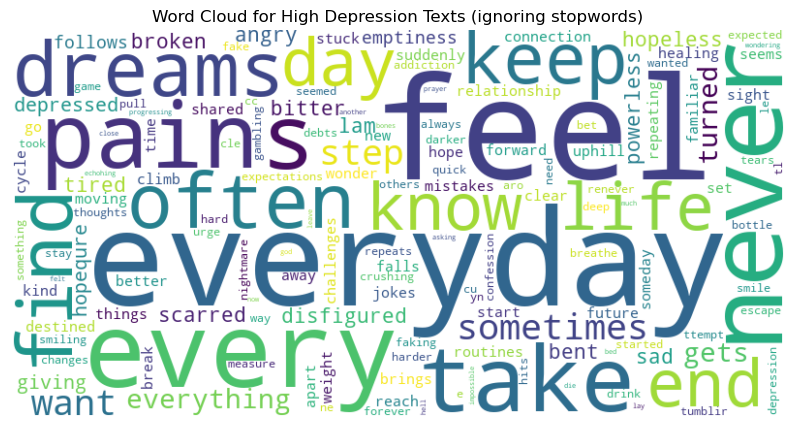

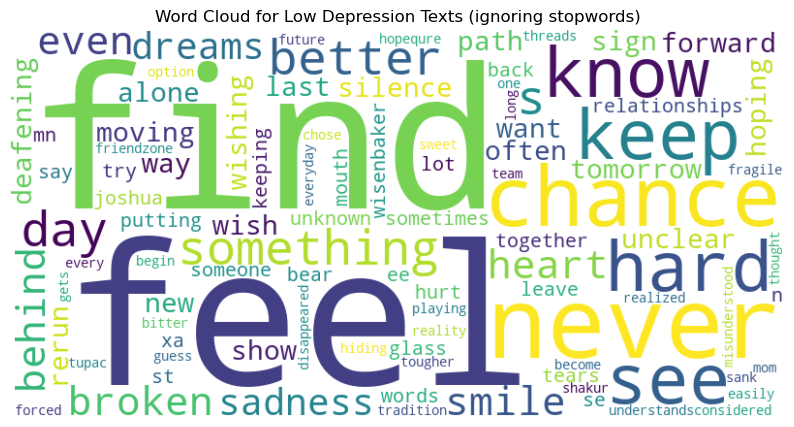

In [70]:
from wordcloud import WordCloud


high_text = " ".join([text for text in high_depression_texts])
wordcloud_high = WordCloud(width=800, height=400, background_color='white').generate(high_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for High Depression Texts (ignoring stopwords)")
plt.show()

low_text = " ".join([text for text in low_depression_texts])
wordcloud_low = WordCloud(width=800, height=400, background_color='white').generate(low_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Low Depression Texts (ignoring stopwords)")
plt.show()
